In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sns.set_palette('pastel')
%matplotlib inline

In [20]:
Sportify_Songs = pd.read_csv('Clean_data.csv', index_col=0)
Sportify_Songs = Sportify_Songs.drop(columns=['index','popularity'])
Sportify_Songs.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'text', 'compression_rate', 'label'],
      dtype='object')

In [6]:
Features = ['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 
       'compression_rate', 'label']

In [21]:
Sportify_Songs.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,compression_rate,label
count,5274.000000,5274.000000,5.274000e+03,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000
mean,0.270669,0.551209,2.409429e+05,0.624554,0.038837,0.191108,-8.405577,0.067301,121.005184,0.513835,0.609696,2.197383
std,0.296629,0.147732,7.454661e+04,0.235856,0.134479,0.157832,3.850799,0.079855,29.820357,0.239093,0.093425,0.775786
min,0.000001,0.127000,3.290700e+04,0.014200,0.000000,0.015700,-25.010000,0.022800,37.114000,0.035000,0.352792,0.000000
25%,0.018125,0.451000,1.980000e+05,0.448000,0.000000,0.095200,-10.875250,0.032300,97.502500,0.322000,0.539348,2.000000
50%,0.139000,0.558000,2.314800e+05,0.656000,0.000021,0.127000,-7.666000,0.041700,119.707500,0.509000,0.611167,2.000000
75%,0.487750,0.655000,2.703035e+05,0.822000,0.002497,0.240000,-5.411250,0.066075,140.034000,0.706000,0.677413,3.000000
max,0.995000,0.986000,1.412451e+06,0.997000,0.940000,0.990000,-0.026000,0.945000,216.051000,0.986000,0.960242,4.000000


In [34]:
#plt.figure(figsize = (12,12))
#sns.heatmap(Sportify_Songs.corr(), cmap="coolwarm", annot=True)
#plt.show()

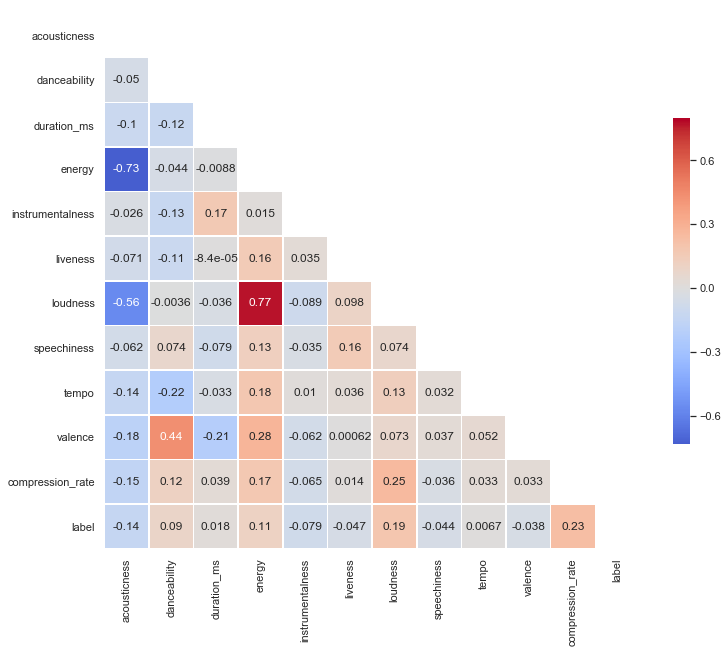

In [33]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = Sportify_Songs.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=0.8, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

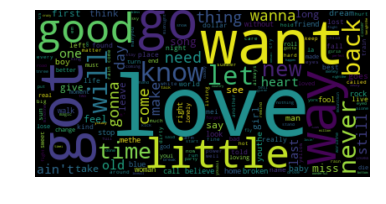

In [42]:
Track_name = Sportify_Songs['track_name'].tolist()
Track_name = ''.join(Track_name)
# Create and generate a word cloud image:
Track_name_wordcloud = WordCloud().generate(Track_name)

# Display the generated image:
plt.imshow(Track_name_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,text,compression_rate,label
3431,Rock,meat loaf,you took the words right out of my mouth (hot ...,7wawEkN4nhPqSBWleGvdxa,0.254000,0.459,304440,0.681,0.000000,D,0.498,-8.773,Major,0.0794,125.020,4/4,0.680,On a hot summer night Would you offer your th...,0.766667,3
3887,Rock,fall out boy,our lawyer made us change the name of this son...,73A0DxzMGDhVGsvHQSaaBq,0.000841,0.504,188547,0.948,0.000004,F,0.383,-3.712,Major,0.0856,154.292,4/4,0.596,Brothers and sisters put this record down Tak...,0.692708,3
4801,Rock,weezer,(if you're wondering if i want you to) i want ...,09aDV0TC2RfWFU5IwZfIdG,0.002190,0.704,208773,0.869,0.000117,B,0.127,-5.708,Minor,0.0442,110.015,4/4,0.800,The moon was shining on the lake at night The...,0.634434,2
4790,Rock,fall out boy,"champagne for my real friends, real pain for m...",78A2FZKzGtkaIIlov5te9S,0.000715,0.439,203813,0.962,0.000000,C,0.720,-3.276,Major,0.1010,160.195,4/4,0.533,"You are a getaway car, a rush of blood to the ...",0.452463,2


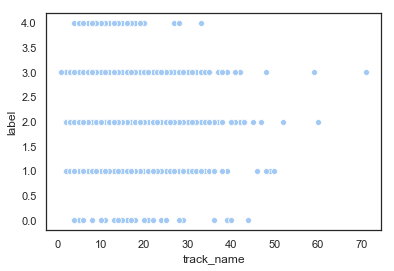

In [101]:
len_track_name = pd.DataFrame(Sportify_Songs['track_name'].str.len())
len_track_name = pd.concat([len_track_name, Sportify_Songs['label']], axis=1)
ax = sns.scatterplot(x="track_name", y="label", data=len_track_name)
Sportify_Songs[(Sportify_Songs['track_name'].str.len()>50)]

In [87]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia=SentimentIntensityAnalyzer()
sentiment = pd.DataFrame(columns=('id','senti_positive', 'senti_neutral', 'senti_negative'))
for i in range(len(Sportify_Songs['track_name'])):
    num_positive = 0
    num_negative = 0
    num_neutral = 0
    track_name= Sportify_Songs.iloc[i,1]
    for j in track_name.split():
        comp = sia.polarity_scores(j)
        comp = comp['compound']
        #print(test)
        if comp >= 0.5:
            num_positive += 1
            #print('positive:',i)
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
        #print('negative:',i)
    sentiment.loc[i] = (Sportify_Songs.iloc[i,3],num_positive,num_neutral,num_negative)

,id,senti_positive,senti_neutral,senti_negative
0,1HNkqx9Ahdgi1Ixy2xkKkL,0,2,0
1,2374M0fQpWi3dLnB54qaLX,0,1,0
2,1EzrEOXmMH3G43AXT1y7pA,0,2,0
3,34gCuhDGsG4bRPIf9bb02f,0,2,0
4,5Nm9ERjJZ5oyfXZTECKmRt,0,2,0


In [78]:
Artist = Sportify_Songs[['artist_name','label']]
count = Artist.groupby(['artist_name']).count()
Mean = Artist.groupby(['artist_name']).mean()
Max = Artist.groupby(['artist_name']).max()
Min = Artist.groupby(['artist_name']).min()
Artist_Popularity = Mean.merge(Max,on='artist_name').merge(Min,on='artist_name').merge(count,on='artist_name')
Artist_Popularity

,label_x,label_y,label_x,label_y
artist_name,,,,
abba,3.000000,3,3,5
ace of base,2.666667,3,2,3
adam sandler,0.512821,2,0,39
adele,2.852941,4,2,34
aerosmith,3.000000,4,2,15
air supply,3.000000,3,3,4
aiza seguerra,3.000000,3,3,1
alabama,2.100000,3,1,20
alice cooper,1.423077,3,1,26
